<h2><center>COMS7047A Term Project: Swahili News Classification</center></h2> 
<h2><center>Notebook 2 - Naive Bayes and SVMs</center></h2> 

<img src="./wits_logo.png" alt="Wits_Logo" style="width: 200px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  2021</center></h4>

In this notebook, the use of classical machine learning techniques will be explored for the classification of Swahili news articles, specifically the Naive Bayes and Support Vector Machine classifiers.

### Table of Contents

- Training data preparation
- Word embeddings
- Model implementation: Naive Bayes Classifier and Support Vector Machine
- Evaluation of classification performance 
- Model optimization: Naive Bayes Classifier and Support Vector Machine
- Final evaluation and discussion

## Training Data Preparation

In [2]:
#----INSTALL LIBRARIES----#
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error, plot_confusion_matrix
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [4]:
#----IMPORT DATA----#
data_path = "./train.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 10 rows of the dataframe") 
df.head(10)

The first 10 rows of the dataframe


,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa
5,SW30734,MAJADILIANO kati ya aliyekuwa Mkurugenzi wa z...,kitaifa
6,SW28096,Mwandishi\nWetu – butiama MKUU wa majeshi\nmst...,kitaifa
7,SW1223,['Huenda Manchester United ikasubiri ukaguzi w...,michezo
8,SW20534,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi
9,SW9193,"RAIS wa Zanzibar, Dk Ali Mohamed Shein amewat...",kitaifa


### Train, validation and test sets

The dataset was split into a training, validation and test set with ratios 70%, 15% and 15% respectively.

In [5]:
#---SPLITTING DATA INTO TRAIN, VALIDATION AND TEST SETS---#

x = df["content"].values # input is news article
y = df["category"].values # output is one of the six categories
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 1/3, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size = 1/2, random_state = 0)

In [6]:
#----NO. OF SAMPLES IN EACH SET----#

print("Training Dataset: {}".format(len(x_train)))
print("Validation Dataset: {}".format(len(x_valid)))
print("Test Dataset: {}".format(len(x_test)))

Training Dataset: 15512
Validation Dataset: 3878
Test Dataset: 3878


### Word embeddings

In order for the news articles to be input to the machine learning algorithms, the text data must first be converted to numerical representation.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [13]:
data_path = "./stopwords.csv" # additional data from Mendeley data
stopword_data = pd.read_csv(data_path) #read in data
stopword_list = stopword_data["StopWords"].values # list of stopwords

#### Building a Vocabulary and Document Term Matrix

As detailed in the previous notebook, the text documents are separated into individual words during tokenization. These are then utilised to:

- Create a vocabulary of words
- Create a *Document Term Matrix* to store the frequency of each word in each document.

These operations are implemented using the *CountVectorizer()* below.

In [14]:
#---CREATE VOCABULARY AND DOCUMENT TERM MATRIX---#

counts = CountVectorizer(stop_words = list(stopword_list)) # input custom stopword list
x_train_counts = counts.fit_transform(x_train) # transforms text articles to feature vectors
x_train_counts.shape

(15512, 162860)

#### Applying Term-Frequency-Inverse-Document-Frequency (TF-IDF)

In order to account for the effects of documents of different lengths as well as words that appear frequently across many documents, we use term-frequency-inverse-document-frequency. We start by applying term-frequency to account for differing document lengths.



To implement this, we use the *TfidfTransformer()* as shown below.


In [15]:
#----APPLY TF-IDF----#

tf = TfidfTransformer(use_idf=False).fit(x_train_counts) # only use tf for now
x_train_tf = tf.transform(x_train_counts) # transform count matrix into tf representation
x_train_tf.shape

(15512, 162860)

## Classification Models

The classification models are now trained and evaluated with the preprocessed training data. We investigate the probabilistic Naive Bayes model in comparison to the more geometric Support Vector Machine classifier.

### Naive Bayes

 Naive Bayes classifiers are a set of probabilistic classifiers based on Bayes' Theorem. Naive Bayes classifiers rely on the assumption of conditional independence between every pair of input features given the target label.

Bayes' Theorem for a set of input features $x_1, ... , x_n$ and target variable $y$ is given by,

\begin{equation}
    P(y | x_1, ... , x_n) = \frac{P(x_1, ... , x_n |y) P(y)}{P(x_1, ... , x_n)}
\end{equation}

which, due to the independence assumption, is simplified to 

\begin{equation}
    P(y | x_1, ... , x_n) = \frac{\prod_{i=1}^n P(x_i | y) P(y)}{P(x_1, ... , x_n)}
\end{equation}

Since $P(x_1, ... , x_n)$ is a normalizing constant, the classification rule can be written as, 

\begin{equation}
    \hat{y} = \arg\max_{y} \prod_{i=1}^n P(x_i | y) P(y)
\end{equation}

#### Multinomial Naive Bayes

Multinomial Naive Bayes is ideal for text classification as it works with discrete counts. 

The algorithm is implemented as a pipeline including the transformation of the news articles into a document term matrix followed by the application of term-frequency and finally the classifier itself.

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
#----MULTINOMIAL NAIVE BAYES----#

mnb = MultinomialNB() # create multinomial naive bayes model

# create pipeline to perform word embeddings and fitting of model in one 
text_mnb = Pipeline([
        ('vect', counts), # create document term matrix
        ('tfidf', tf), # apply term-frequency to account for different article lengths
        ('clf', mnb), ]) # multinomial naive bayes classifier

In [ ]:
#---FIT TO TRAINING DATA---#

text_mnb.fit(x_train, y_train) # fit the model to the training set

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['na', 'lakini', 'ingawa',
                                             'ingawaje', 'kwa', 'sababu',
                                             'hadi', 'hata', 'kama', 'ambapo',
                                             'ambamo', 'ambako', 'ambacho',
                                             'ambao', 'ambaye', 'ilhali', 'ya',
                                             'yake', 'yao', 'yangu', 'yetu',
                                             'yenu', 'vya', 'vyao', 'vyake',
                                             'vyangu', 'vyenu', 'vyetu', 'yako',
                                             'yao', ...])),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf', MultinomialNB())])

### Support Vector Machines (SVMs)

Support Vector Machines (SVMs) aim to find the optimal set of hyperplanes to separate the feature space into classes.
A good choice of hyperplane will result in a large distance between the hyperplane and the nearest data point belonging to a specific class, known as a margin. Thus, in the context of classification, Support Vector Machines aim to solve the primal problem defined by, 

\begin{equation}
\begin{split}
    \min_{w, b, \gamma} &= \frac{1}{2}w^Tw + C\sum_{i=1}^n \gamma_i \\
    subject \; to \; & y_i(w^T\phi(x_i) + b) \geq 1- \gamma_i
\end{split}
\end{equation}

which represents the maximization of the margin by minimizing the squared norm of the weights ω, and introduces
a penalty for misclassified samples, as controlled by the
parameter $C$.

#### SVM Hyperparameters

- The SVM is trained with stochastic gradient descent with *l2* loss as the penalty term. 
- The $\alpha$ term controls the strength of the regularization and was initialized to $1 × 10^{−3}$. 
- The number of epochs was set to 5 initially. 

All hyperparameters are then further optimized during model optimization.

#### Linear SVM

The model uses hinge loss, therefore implementing a linear SVM.

In [17]:
from sklearn.linear_model import SGDClassifier

In [ ]:
#----SUPPORT VECTOR MACHINE----#

# create SVM model with initial hyperparameters
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

# create pipeline to perform word embeddings and fitting of model in one 
text_svm = Pipeline([
    ('vect', counts), # create document term matrix
    ('tfidf',  tf), # apply term-frequency to account for different article lengths
    ('clf', svm), # support vector classifier
])


In [ ]:
#---FIT TO TRAINING DATA---#

text_svm.fit(x_train, y_train) #  fit the SVM model to the training set

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['na', 'lakini', 'ingawa',
                                             'ingawaje', 'kwa', 'sababu',
                                             'hadi', 'hata', 'kama', 'ambapo',
                                             'ambamo', 'ambako', 'ambacho',
                                             'ambao', 'ambaye', 'ilhali', 'ya',
                                             'yake', 'yao', 'yangu', 'yetu',
                                             'yenu', 'vya', 'vyao', 'vyake',
                                             'vyangu', 'vyenu', 'vyetu', 'yako',
                                             'yao', ...])),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

## Metrics and Evaluation


To provide a thorough analysis of the classification performance of each of the models, several metrics will be reported, including *test accuracy, precision, recall* and *F1-score*. Each of the chosen metrics provides different insight into the performance of the models. In addition, the *confusion matrix* will be plotted to indicate the nature of the misclassifications.

1. Accuracy 

Accuracy provides a measure of how many samples are correctly predicted and is calculated as follows,

\begin{equation}
    Accuracy = \frac{(TP + TN)}{(TN + FP + FN + TP)}
\end{equation}


where $TP, TN, FP$ and $FN$ represent the number of true positives, true negatives, false positives and false negatives respectively. However the test accuracy can provide a skewed metric in the case of imbalanced datasets as good performance on the majority class will translate to high accuracy. 

2. Precision

Precision can be interpreted as the confidence that a certain positive classification is correct and is calculated as, 

\begin{equation}
    Precision = \frac{TP}{(TP + FP)}
\end{equation}


3. Recall

Recall, also known as the True Positive Rate (TPR) measures the rate at which all samples labelled as positive are
identified,

\begin{equation}
    Recall = \frac{TP}{(TP+FN)}
\end{equation}


4. F1-Score

The F1-score is the harmonic mean of the precision and recall and therefore provides a combined metric balancing these two objectives.

\begin{equation}
    F1 \; Score = \frac{(2*precision*recall)}{(precision+recall)}
\end{equation}

The F1-score provides an insightful metric in the face of class imbalance as it incorporates both precision and recall and is not skewed by the majority class.

The metrics will be implemented as a combination of the *metrics* package and custom functions for the confusion matrix and accuracy.

In [18]:
#----METRICS AND EVALUATION----#

from sklearn import metrics

### Naive Bayes

#### Classification Performance

In [ ]:
#---NAIVE BAYES TEST ACCURACY---#

predicted = text_mnb.predict(x_test)
accuracy = np.mean(predicted == y_test)

print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.6681279009798865


In [ ]:
#---CLASSIFICATION REPORT---#

print(metrics.classification_report(y_test, predicted,  target_names=['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'], zero_division=1))

              precision    recall  f1-score   support

        afya       1.00      0.00      0.00       157
    burudani       0.84      0.14      0.23       340
   kimataifa       1.00      0.00      0.00       300
     kitaifa       0.58      0.99      0.73      1736
     michezo       0.94      0.84      0.89       975
      uchumi       1.00      0.04      0.08       370

    accuracy                           0.67      3878
   macro avg       0.89      0.33      0.32      3878
weighted avg       0.78      0.67      0.58      3878



Given the imbalanced nature of our dataset, we use the F1-score as our primary metric as it provides a balance of
precision and recall. In addition, the macro average for the precision, recall and F1-score is favoured rather than the weighted average as it places equal importance on each news category and provide a fairer representation of model
performance.

#### Confusion Matrix

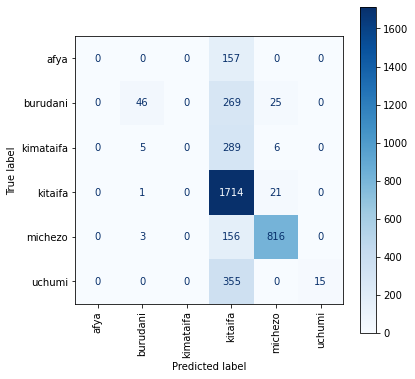

In [ ]:
#----CONFUSION MATRIX----#

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(text_mnb, x_test, y_test, cmap=plt.cm.Blues, xticks_rotation = 'vertical', ax=ax)  
plt.savefig('naive_bayes_confusion_matrix', dpi = 300, bbox_inches='tight')
plt.show() 

#### Analysis

From the confusion matrix above, it can be clearly seen that the Naive Bayes classifier favours the majority *kitaifa* class as there are many misclassifications where the alternate classes are predicted to be in the *kitaifa* category. This effect is quite severe as the health news category *afya* with the lowest representation has no correct classifications and is always predicted to be in the majority *kitaifa* class. 

This explains the recall score of zero for the *afya* and *kimataifa* classes in the classification report above, as no correct classifications are made for thes under-represented classes.

### Support Vector Machine (SVM) 

#### Classification Performance

In [ ]:
#---SVM TEST ACCURACY---#

predicted = text_svm.predict(x_test)
accuracy = np.mean(predicted == y_test)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8408973697782363


In [ ]:
#---CLASSIFICATION REPORT---#

print(metrics.classification_report(y_test, predicted, target_names=['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi']))

              precision    recall  f1-score   support

        afya       1.00      0.01      0.01       157
    burudani       0.81      0.89      0.84       340
   kimataifa       0.87      0.73      0.80       300
     kitaifa       0.78      0.95      0.86      1736
     michezo       0.95      0.93      0.94       975
      uchumi       0.93      0.48      0.63       370

    accuracy                           0.84      3878
   macro avg       0.89      0.66      0.68      3878
weighted avg       0.86      0.84      0.82      3878



Overall, the SVM approach far outperforms the Naive Bayes classifier across all metrics. In particular, a great improvement in recall in observed for the *kimataifa* class which had a recall of zero in the case of the Naive Bayes classifier.

#### Confusion Matrix

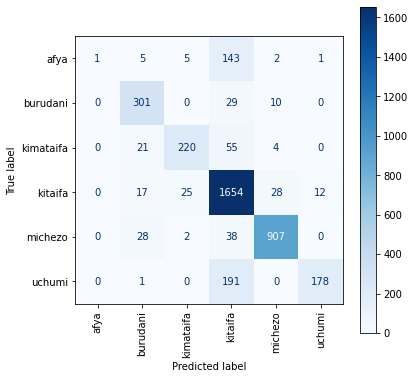

In [ ]:
#----CONFUSION MATRIX----#

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(text_svm, x_test, y_test, cmap='Blues', xticks_rotation = 'vertical', ax=ax)  
plt.savefig('svm_confusion_matrix', dpi = 300, bbox_inches='tight')
plt.show()

In contrast to the Naive Bayes classifier, the SVM indicates much better performance as larger numbers of correct classifications are indicated along the diagonal, with less dominance of the majority *kitaifa* class. However, poor results are still obtained for the least represented *afya* class as only one sample is correctly classified. 

Therefore model optimization is needed to ensure viable classification performance.

## Model Optimization and Improvement

Following on from the naive implementation of each of the machine learning algorithms, a thorough investigation into the role of the design choices and model parameters is undertaken.

In order to improve on the baseline results, several optimization techniques will be considered for each algorithm.

### Naive Bayes

Since the Naive Bayes model contains very finite parameters, parameter tuning is not an effective means of optimization. Instead, the problem of class imbalance is addressed by integrating information regarding the complement of each target class. 

### Complement Naive Bayes

The mechanism of the Naive Bayes approach depends strongly on the underlying distribution. Complement Naive Bayes is an adaptation of the multinomial Naive Bayes classifier which aims to overcome the problems associated with imbalanced datasets. Specifically, model parameters are estimated by training with data from all the classes *excluding* the current class $c$.

The same word embeddings stages including the creation of the *Document Term Matrix* and application of *term frequency* are once again included in the model pipeline.

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
#---COMPLEMENT NAIVE BAYES---#

cnb = ComplementNB()
text_cnb = Pipeline([
        ('vect', counts), # create document term matrix
        ('tfidf', tf), # apply term frequency
        ('clf', cnb), ]) # complement naive bayes

text_cnb.fit(x_train, y_train) # estimate parameters

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['na', 'lakini', 'ingawa',
                                             'ingawaje', 'kwa', 'sababu',
                                             'hadi', 'hata', 'kama', 'ambapo',
                                             'ambamo', 'ambako', 'ambacho',
                                             'ambao', 'ambaye', 'ilhali', 'ya',
                                             'yake', 'yao', 'yangu', 'yetu',
                                             'yenu', 'vya', 'vyao', 'vyake',
                                             'vyangu', 'vyenu', 'vyetu', 'yako',
                                             'yao', ...])),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf', ComplementNB())])

In [ ]:
#---COMPLEMENT NAIVE BAYES TEST ACCURACY---#

predicted = text_cnb.predict(x_test)
accuracy = np.mean(predicted == y_test)
print(accuracy)

0.7774626095925735


We observe an 11% increase in test accuracy from the introduction of complement information.

In [ ]:
#---CLASSIFICATION REPORT---#

print(metrics.classification_report(y_test, predicted,  target_names=['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'], zero_division=1))

              precision    recall  f1-score   support

        afya       1.00      0.00      0.00       157
    burudani       0.87      0.74      0.80       340
   kimataifa       1.00      0.23      0.37       300
     kitaifa       0.69      0.98      0.81      1736
     michezo       0.95      0.91      0.93       975
      uchumi       1.00      0.29      0.45       370

    accuracy                           0.78      3878
   macro avg       0.92      0.52      0.56      3878
weighted avg       0.84      0.78      0.74      3878



Furthermore, a very notable increase in macro F1-score is observed after model optimization with 24% improvement over the baseline Naive Bayes model.

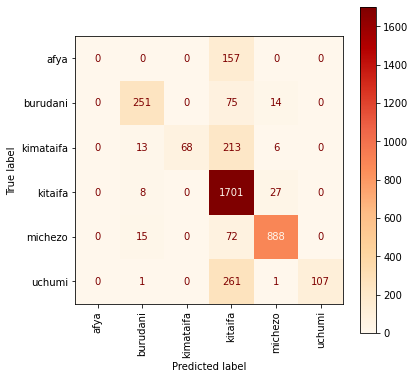

In [ ]:
#---CONFUSION MATRIX---#

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(text_cnb, x_test, y_test, cmap='OrRd', xticks_rotation = 'vertical', ax=ax)  
plt.savefig('naive_bayes_improved_confusion_matrix', dpi = 300, bbox_inches='tight')
plt.show() 

In contrast to the initial results from multinomial Naive Bayes, the confusion matrix indicates improved performance with more correct classifications along the diagonal. However, for the *afya* class, no correct classifications are made, therefore suggesting that the use of Complementary Naive Bayes can only improve performance to a certain extent before a more complex classifier is needed.

### Support Vector Machines (SVMs)

Support Vector Machines involve a number of hyperparameters that can be tuned for optimal performance.

### 1. Correcting for Class Imbalance

The *class weight* parameter allows more importance to be placed on classes that are under-represented in the dataset.


In [20]:
#----TRAIN OPTIMIZED SVM WITH CLASS WEIGHT----#

# create SVM model
svm_balanced = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None, class_weight = 'balanced',  n_jobs=-1)

text_svm_balanced = Pipeline([
    ('vect', counts),
    ('tfidf',  tf),
    ('clf', svm_balanced),
])

text_svm_balanced.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['na', 'lakini', 'ingawa',
                                             'ingawaje', 'kwa', 'sababu',
                                             'hadi', 'hata', 'kama', 'ambapo',
                                             'ambamo...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                          

In [21]:
#---SVM + CLASS WEIGHT TEST ACCURACY---#

predicted = text_svm_balanced.predict(x_test)
accuracy = np.mean(predicted == y_test)
print(accuracy)

0.8396080453842186


In [ ]:
#---CLASSIFICATION REPORT---#

print(metrics.classification_report(y_test, predicted,  target_names=['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'], zero_division=1))

              precision    recall  f1-score   support

        afya       0.43      0.62      0.51       157
    burudani       0.78      0.94      0.85       340
   kimataifa       0.77      0.84      0.81       300
     kitaifa       0.88      0.82      0.85      1736
     michezo       0.96      0.92      0.94       975
      uchumi       0.73      0.72      0.73       370

    accuracy                           0.84      3878
   macro avg       0.76      0.81      0.78      3878
weighted avg       0.85      0.84      0.84      3878



Notably, the macro F1-score has improved by 10% from 0.68 to 0.78. Since F1-score is a better metric for our imbalance problem, this demonstrates the benefits of introducing the class weight parameter.

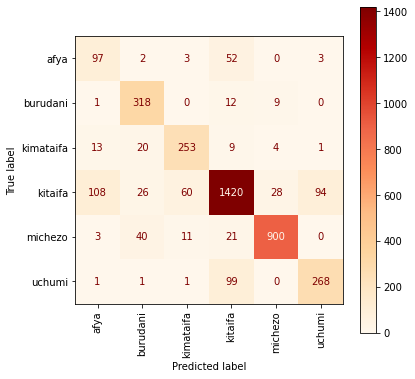

In [ ]:
#---CONFUSION MATRIX---#

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(text_svm_balanced, x_test, y_test, cmap='OrRd', xticks_rotation = 'vertical', ax=ax)  
plt.savefig('svm_balanced_confusion_matrix', dpi = 300, bbox_inches='tight')
plt.show() 

Furthermore, the confusion matrix shows a clear improvement in correct predicitions for the under-represented *afya* class. The predictions for the poorly represented *afya* class experience a great improvement with 97 correct classifications rather than 1 correct classification obtained previously. 

### 2. Grid Search

Grid search is an exhaustive search of specified parameters in order to find the optimal combination. 

In [19]:
from sklearn.model_selection import GridSearchCV

In [22]:
# print all possible hyperparameters that can be tuned

text_svm_balanced.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__average', 'clf__class_weight', 'clf__early_stopping', 'clf__epsilon', 'clf__eta0', 'clf__fit_intercept', 'clf__l1_ratio', 'clf__learning_rate', 'clf__loss', 'clf__max_iter', 'clf__n_iter_no_change', 'clf__n_jobs', 'clf__penalty', 'clf__power_t', 'clf__random_state', 'clf__shuffle', 'clf__tol', 'clf__validation_fraction', 'clf__verbose', 'clf__warm_start'])

We explore variants of the ngram range, tf-idf, $\alpha$ parameter and number of epochs.

In [23]:
# select parameters to search through

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3, 1e-4),
    'clf__max_iter': (10, 50, 100),
}
gs_clf = GridSearchCV(text_svm_balanced, parameters, cv=5) # apply grid search

In [24]:
gs_clf = gs_clf.fit(x_train[0:10000], y_train[0:10000]) # use subset of data 

In [25]:
predicted = gs_clf.predict(x_test)
accuracy = np.mean(predicted == y_test)
print(accuracy)

0.8620422898401238


In [26]:
#---CLASSIFICATION REPORT---#

print(metrics.classification_report(y_test, predicted,  target_names=['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'], zero_division=1))

              precision    recall  f1-score   support

        afya       0.49      0.37      0.42       157
    burudani       0.81      0.91      0.86       340
   kimataifa       0.83      0.86      0.85       300
     kitaifa       0.87      0.88      0.87      1736
     michezo       0.95      0.94      0.95       975
      uchumi       0.79      0.72      0.76       370

    accuracy                           0.86      3878
   macro avg       0.79      0.78      0.78      3878
weighted avg       0.86      0.86      0.86      3878



The best parameters found from the grid search are shown below.

In [27]:
#---BEST COMBINATION FOUND---#

gs_clf.best_params_

{'clf__alpha': 0.0001,
 'clf__max_iter': 50,
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 2)}

### Final SVM model after grid search

Several optimizations were discovered through the grid search process.

#### a) Ngram range

It was found that expanding the *n-gram* range from (1, 1) to (1, 2) was beneficial during the creation of
the Document Term Matrix. An *n-gram* range of (1, 2) expands the *n-gram* construction to include bigrams as well
as unigrams.

In [ ]:
#---NGRAM RANGE = (1, 2)---#

counts_best = CountVectorizer(stop_words = list(stopword_list), ngram_range=(1, 2)) # include bigrams
x_train_counts = counts_best.fit_transform(x_train)
x_train_counts.shape

(15512, 1789156)

#### b) TF-IDF

A further optimization is the inclusion of *inverse-document-frequency* as well as *term-frequency* in order to account for the prevalence of a term across the corpus as a whole.

In [ ]:
#---INCLUDING INVERSE DOCUMENT FREQUENCY---#

tf_best = TfidfTransformer(use_idf=True).fit(x_train_counts)
x_train_tf = tf_best.transform(x_train_counts)
x_train_tf.shape

(15512, 1789156)

#### c) SVM Hyperparameters

The optimal values for the regularization parameter and number of epochs were found to be:

- $\alpha$ = $1 \times 10^4$
- max iter = 50

In [ ]:
#---CREATE AND TRAIN OPTIMIZED SVM MODEL---#

svm_grid = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=50, tol=None, class_weight = 'balanced',  n_jobs=-1)

text_svm_grid = Pipeline([
    ('vect', counts_best),
    ('tfidf',  tf_best),
    ('clf', svm_grid),
])

text_svm_grid.fit(x_train, y_train) 

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 stop_words=['na', 'lakini', 'ingawa',
                                             'ingawaje', 'kwa', 'sababu',
                                             'hadi', 'hata', 'kama', 'ambapo',
                                             'ambamo', 'ambako', 'ambacho',
                                             'ambao', 'ambaye', 'ilhali', 'ya',
                                             'yake', 'yao', 'yangu', 'yetu',
                                             'yenu', 'vya', 'vyao', 'vyake',
                                             'vyangu', 'vyenu', 'vyetu', 'yako',
                                             'yao', ...])),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(class_weight='balanced', max_iter=50, n_jobs=-1,
                               random_state=42, tol=None))])

In [ ]:
#---SVM + GRID SEARCH TEST ACCURACY---#

predicted = text_svm_grid.predict(x_test)
accuracy = np.mean(predicted == y_test)
print(accuracy)

0.8625580195977308


In [ ]:
#---CLASSIFICATION REPORT---#

print(metrics.classification_report(y_test, predicted,  target_names=['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'], zero_division=1))

              precision    recall  f1-score   support

        afya       0.47      0.45      0.46       157
    burudani       0.80      0.94      0.86       340
   kimataifa       0.83      0.87      0.85       300
     kitaifa       0.88      0.87      0.87      1736
     michezo       0.96      0.94      0.95       975
      uchumi       0.79      0.75      0.77       370

    accuracy                           0.86      3878
   macro avg       0.79      0.80      0.79      3878
weighted avg       0.86      0.86      0.86      3878



As indicated by the metrics above, the test accuracy and f1-score improved by 2% and 1% respectively due to the optimal hyperparameters found.

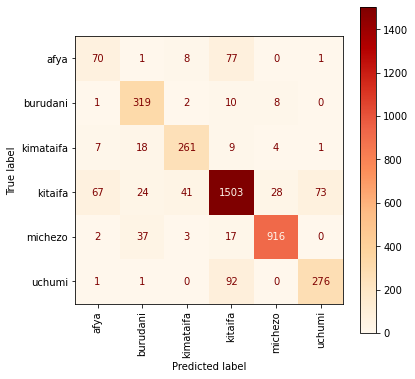

In [ ]:
#---CONFUSION MATRIX---#

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(text_svm_grid, x_test, y_test, cmap='OrRd', xticks_rotation = 'vertical', ax=ax)  
plt.savefig('svm_grid_confusion_matrix', dpi = 300, bbox_inches='tight')
plt.show() 

The SVM after both the *class weight* and *grid search* optimizations obtains the best performance out of the classical machine learning approaches and their respective variants, obtaining 86% accuracy and an F1-score of 79%.

The next notebook will explore deep learning techniques as an alternative to classical machine learning approaches to text classification.